# Simple Linear Regression

We have to create a linear regression model for a dummy data. We have to create model using numpy array only.

#### No use of sklearn or any other package should be done

In [1]:
## Import packages

from numpy import *
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two columns say X any Y.The data is some random set of points. Import the data and try to plot it using matplotlib.

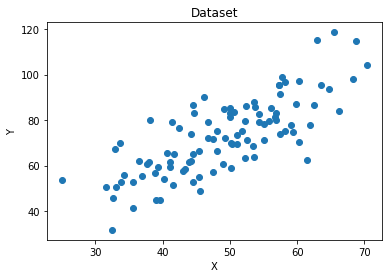

In [2]:
# Import data
points = genfromtxt('data.csv', delimiter=',')

# Extract columns
x = array(points[:,0])
y = array(points[:,1])

# Plot the dataset
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

Define learning rate, initial values of c and m and number of EPOCHS.

In [3]:
# Hyperparamters
learning_rate = 0.00001
initial_c = 0
initial_m = 0
num_iterations = 100

#### Define cost function
Define a function that for the value of c and m predicts the MSE

In [4]:
def compute_cost(c, m, points):
    total_cost = 0
    N = float(len(points))
    
    # Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + c)) ** 2
        
    # Return average of squared error
    return total_cost/N

#### Define Gradient Descent functions

Write a function that define gradient descent and return updated value of c and m

In [5]:
def gradient_descent_runner(points, starting_c, starting_m, learning_rate, num_iterations):
    c = starting_c
    m = starting_m
    cost_graph = []

    # For every iteration, optimize c, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(c, m, points))
        c, m = step_gradient(c, m, array(points), learning_rate)

    return [c, m, cost_graph]

def step_gradient(c_current, m_current, points, learning_rate):
    m_gradient = 0
    c_gradient = 0
    N = float(len(points))

    # Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + c_current))
        c_gradient += - (2/N) * (y - (m_current * x + c_current))
    
    # Update current m and c
    m_updated = m_current - learning_rate * m_gradient
    c_updated = c_current - learning_rate * c_gradient

    # Return updated parameters
    return c_updated, m_updated

#### Run gradient_descent_runner() to get optimized parameters b and m

In [6]:
c, m, cost_graph = gradient_descent_runner(points, initial_c, initial_m, learning_rate, num_iterations)

# Print optimized parameters
print ('Optimized b:', c)
print ('Optimized m:', m)

# Print error with optimized parameters
print ('Minimized cost:', compute_cost(c, m, points))

Optimized b: 0.02949361544713032
Optimized m: 1.4700028426067162
Minimized cost: 112.84803925712856


#### Plot the cost per iterations

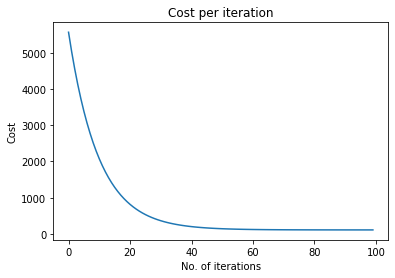

In [7]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

### Gradient descent converges to local minimum after ____ iterations

#### Plot line of best fit

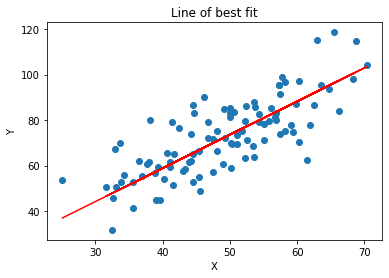

In [8]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + c
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line of best fit')
plt.show()